In [4]:
import numpy as np
import matplotlib.pyplot as plt




In [8]:
def show_curve_comparison(random_arr, 
                          strategy_name_list, 
                          folder_name, 
                          algorithm_name, 
                          group_name_list, 
                          fig_save_path, 
                          legend_save_path,
                          separate_legend=False,
                          infer_dir=""):
    plt.figure(figsize=(10, 10))
    plt.yticks(fontproperties='Times New Roman', size=15, weight='bold')
    plt.xticks(fontproperties='Times New Roman', size=15, weight='bold')
    plt.ylim((-15, 17))
    plt.xlim((0, 7))

    for sidx in range(1, 8):

        res_list = []
        user_bias_prop_arr_path=os.path.join(infer_dir, f"{folder_name}/{folder_name}_dynamic_s{sidx}.npy")
        with open(user_bias_prop_arr_path, "rb") as f:
            bias_prop_user_all_arr = np.load(f)

        x = np.arange(66)

        for jdx, idx in enumerate(range(0, 2000, 250)):
            baseline = random_arr[jdx]
            y = np.average(bias_prop_user_all_arr[idx: idx + 250], axis=0)
            base_area = np.trapz(baseline, x)
            y_area = np.trapz(y, x)
            res_list.append(y_area - base_area)
        plt.plot(res_list, 'o-', label=strategy_name_list[sidx-1], linestyle='dashed')

    plt.hlines(y=0, xmin=0, xmax=7, color='black', linestyle='dashed')
#     plt.title(f'{algorithm_name}')
    plt.xticks(range(8), group_name_list)
#     plt.grid()
    
    if not separate_legend:
        legend = plt.legend(bbox_to_anchor=(1.0, 0.23), ncol=1,)
        plt.savefig(fig_save_path, format='png', bbox_inches='tight')
    else:
        plt.savefig(fig_save_path, format='pdf')
    
#         legend = plt.legend(ncol=7,)
#         def export_legend(legend, filename="legend.png", expand=[-5,-5,5,5]):
#             fig  = legend.figure
#             fig.canvas.draw()
#             bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#             fig.savefig(filename, dpi="figure", bbox_inches=bbox)
#         export_legend(legend=legend,
#                       filename=legend_save_path)
    
    plt.show()
    plt.close()

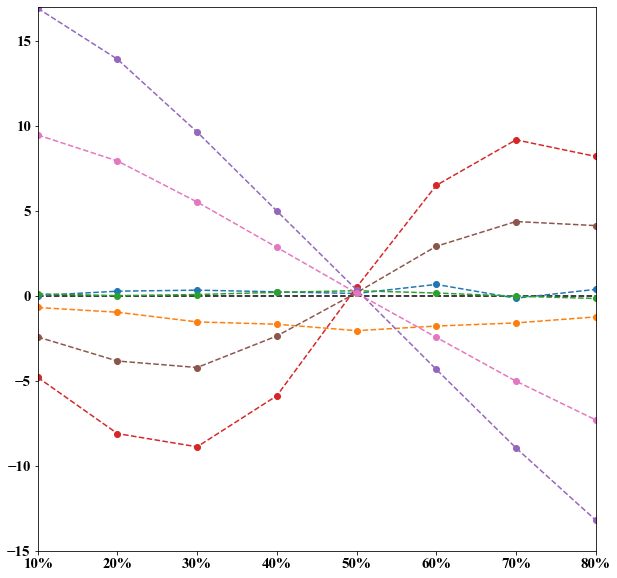

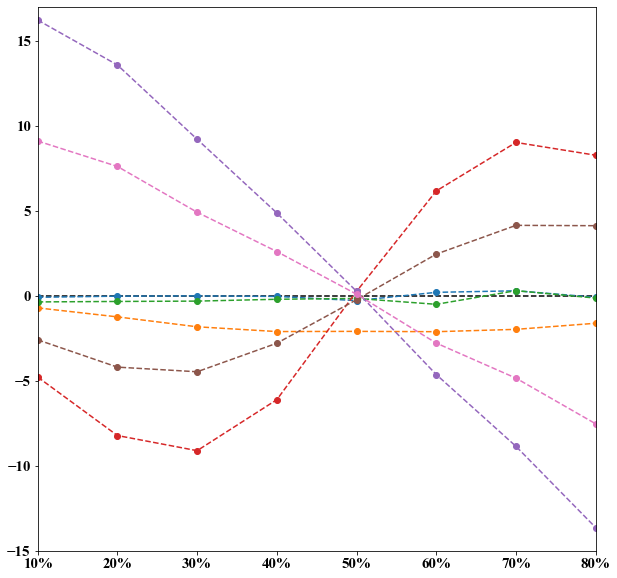

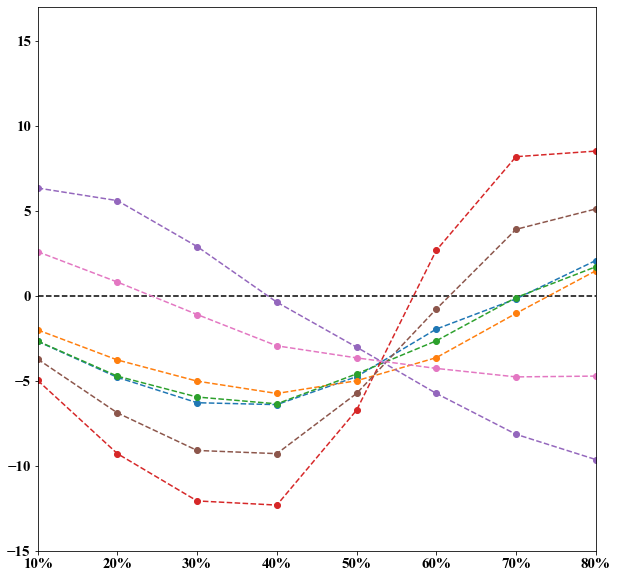

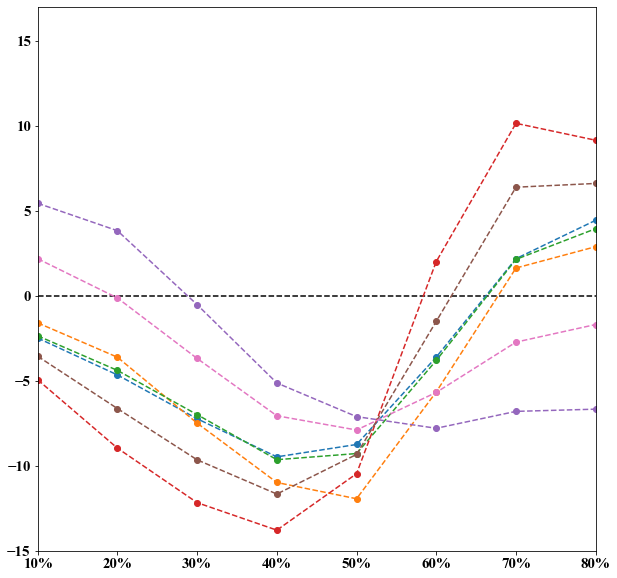

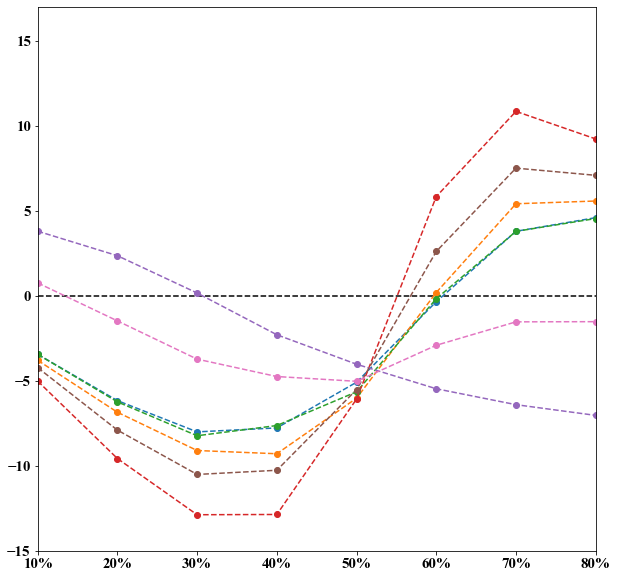

In [9]:

fig_save_dir_path=""
legend_save_dir_path=""
folder_name_list = ['naml', 'npa', 'nrms', 'plm', 'fim', ]
algorithm_name_list = ['NAML', 'NPA', 'NRMS', 'PLM.', 'FIM']
strategy_name_list = ['Equal-Rec', 'Top-K-Rec', 'Log-Rank-Rec', 
                      'Supportive-User-Awareness', 'Adversial-User-Awareness',
                      'LRR-SUA', 'LRR-AUA']

bias_arr = np.array([5, 10, 15, 20, 25, 30, 35, 40])
unbias_arr = np.array([45, 40, 35, 30, 25, 20, 15, 10])
bias_prop_arr = bias_arr/(bias_arr+unbias_arr)
random_arr = [[bias_prop_val, ] * 66 for bias_prop_val in bias_prop_arr]
group_name_list = [f'{bias_prop_val*100:.0f}%' for bias_prop_val in bias_prop_arr]
    
for folder_name, algorithm_name in zip(folder_name_list, algorithm_name_list):
    fig_save_path=os.path.join(fig_save_dir_path, f"{folder_name}/{folder_name}_cumulative_effect.pdf")
    legend_save_path=os.path.join(legend_save_dir_path, f"{folder_name}/{folder_name}_cumulative_effect_legend.pdf")
    show_curve_comparison(
                          random_arr=random_arr, 
                          strategy_name_list=strategy_name_list, 
                          folder_name=folder_name,
                          algorithm_name=algorithm_name,
                          group_name_list=group_name_list,
                          fig_save_path=fig_save_path,
                          legend_save_path=legend_save_path,
                          separate_legend=True,)




In [ ]:
# legend
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
user_group_list = ['Equal-Rec', 'Top-K-Rec', 'Log-Rank-Rec', 
                   'Supportive-User-Awareness', 'Adversial-User-Awareness', 
                   'LRR-SUA', 'LRR-AUA']
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
             'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']
custom_lines = []
for color_name in color_list:
    custom_lines.append(Line2D([0], [0], color=color_name, lw=4))

fig, ax = plt.subplots()
# lines = ax.plot(data)
legend = ax.legend(custom_lines, user_group_list, bbox_to_anchor=(1.0, 1.23), ncol=8, fontsize=15, )
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi='figure', format='pdf', bbox_inches=bbox)
export_legend(legend=legend,
              filename="")